# Homework 4 Solutions


## Problem 1

The posterior is
\begin{align*}
\pi(\lambda | x) &\propto f(x|\lambda) \pi(\lambda)\\
&= \left(\prod_{i=1}^n \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}\right)  \pi(\lambda)\\
&\propto \lambda^{\sum_i x_i} e^{-n\lambda} \pi(\lambda)\\
&=  \lambda^{\sum_i x_i} e^{-n\lambda}  \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1}e^{-\beta \lambda}\\
&\propto \lambda^{\sum_i x_i+\alpha -1 } e^{-\lambda (n + \beta)}\\
&\propto Gamma(\alpha' = \alpha + \sum_i x_i,\beta' = \beta + n)
\end{align*}

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
x = np.array([4,5,1,3,3,1,4,5,0,5])
n = np.size(x)
np.mean(x)

3.1

In [3]:
## prior parameters
alpha = 3
beta = 1/2

In [4]:
## posterior parameters
alphaprime = alpha + np.sum(x)
betaprime =  beta + n

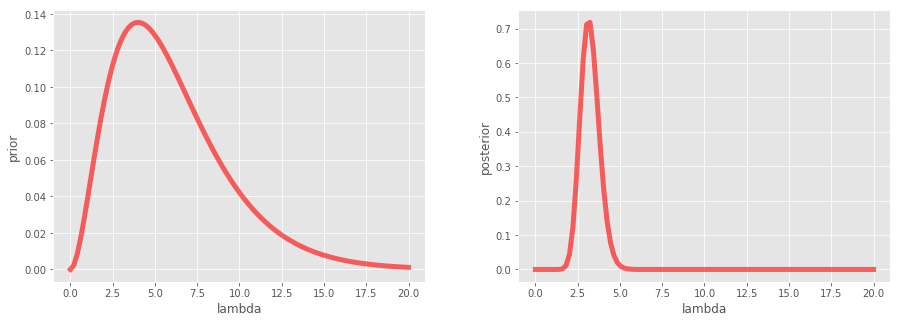

In [6]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.25)

lmbda = np.linspace(0,20,100)

### plot the prior
ax = fig.add_subplot(1, 2, 1)
ax.plot(lmbda, scipy.stats.gamma.pdf(lmbda,a=alpha,scale=1/beta),
         'r-', lw=5, alpha=0.6, label='gamma prior')
ax.set(xlabel='lambda', ylabel='prior');


### plot the posterior
ax = fig.add_subplot(1, 2, 2)
ax.plot(lmbda, scipy.stats.gamma.pdf(lmbda,a=alphaprime,scale=1/betaprime),
         'r-', lw=5, alpha=0.6, label='gamma posterior')
ax.set(xlabel='lambda', ylabel='posterior');

## Problem 2

The posterior is proportional to

In [7]:
sumx = np.sum(x)

In [8]:
def postp(lmbda):
    return scipy.stats.gamma.pdf(lmbda,a=alpha,scale=1/beta)*np.power(lmbda,sumx)*np.exp(-lmbda*n)

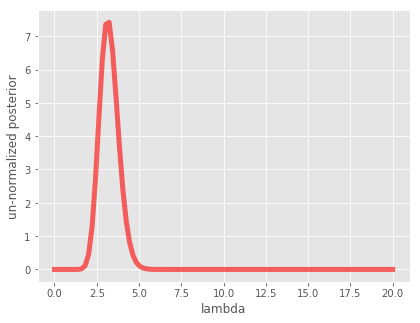

In [11]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.25)

lmbda = np.linspace(0,20,100)

### plot the prior
ax = fig.add_subplot(1, 2, 1)
ax.plot(lmbda, postp(lmbda),
         'r-', lw=5, alpha=0.6, label='posterior')
ax.set(xlabel='lambda', ylabel='un-normalized posterior');

In [12]:
import scipy.integrate as integrate
mx = integrate.quad(lambda lmbda: postp(lmbda), 0, 20)

In [13]:
mx

(10.330694908547137, 2.1632443382721938e-08)

In [14]:
## get plot sizes reasonable
plt.rcParams['figure.figsize'] = (7, 3)

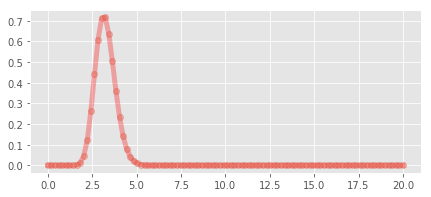

In [15]:
ax = plt.axes()
### plot the posterior using conjugacy result
ax.plot(lmbda, scipy.stats.gamma.pdf(lmbda,a=alphaprime,scale=1/betaprime),'r-', lw=5, alpha=0.3)
ax.plot(lmbda, postp(lmbda)/mx[0],'o', lw=5, alpha=0.3);

The numerically approximated and conjugate posterior match very well.

## Problem 3

In [16]:
## an simple implementation Metropolis Hastings algorithm
Niter = 50000
chain = np.zeros(Niter)
chain[0] = 0.3

In [17]:
for ii in np.arange(Niter-1):
        prop = chain[ii] + np.random.normal(loc=0.0,scale=0.5,size=1)
        if (postp(prop) / postp(chain[ii])) > np.random.uniform():
            chain[ii+1] = prop
        else:
            chain[ii+1] = chain[ii]

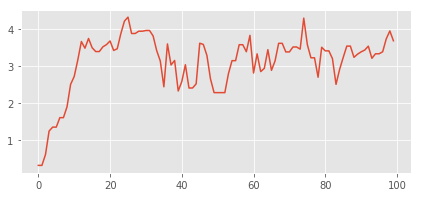

In [18]:
## the chain takes 40+ iterations to converge to a steady state
## usually much longer for more realistic problems
## this is known as burn in
fig = plt.figure()
ax = plt.axes()
plt.plot(np.arange(100), chain[:100]);

Looks like chain has converged to steady state after about 40 iterations.

In [20]:
## remove the first 1000 iterations to get rid of burn in
## could remove less, but we usually try to be conservative
chain = chain[1000:]

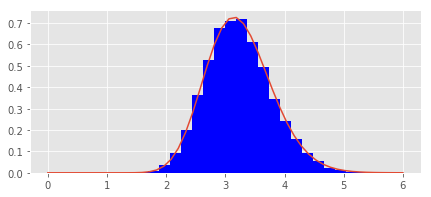

In [21]:
fig = plt.figure()
ax = plt.axes()
ns, bins, rectangles = ax.hist(chain,25,density=True,color='blue')
p = np.linspace(.5,.85,100);
lmbda = np.linspace(0,6)
plt.plot(lmbda, scipy.stats.gamma.pdf(lmbda,a=alphaprime,scale=1/betaprime));

The posterior computed with metropolis looks very similar to the posterior computed using the conjugate result.

In [22]:
chain_s = np.sort(chain)
ixL = np.floor(np.size(chain_s)*.025).astype(int) ## lower index
ixU = np.floor(np.size(chain_s)*.975).astype(int) ## upper index

The lower bound for a 95% credible interval is

In [23]:
chain_s[ixL]

2.2370331888433044

The upper bound for a 95% credible interval is

In [24]:
chain_s[ixU]

4.398551005446103

To verify that these are the correct numbers we use the ppf functions

In [25]:
lhs = scipy.stats.gamma.ppf(0.025, a=alphaprime, scale=1/betaprime)
rhs = scipy.stats.gamma.ppf(0.975, a=alphaprime, scale=1/betaprime)
print(lhs)
print(rhs)

2.242475084244978
4.4137399303970755


Posterior mean from conjugacy and Metropolis are very close as well.

In [26]:
np.mean(chain)

3.2222015779980913

In [27]:
alphaprime / betaprime

3.238095238095238